In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn import tree
import matplotlib as matplotlib

In [3]:
import io
from google.colab import files
uploaded = files.upload()

Saving Sample Data for Random Forest (Heart Disease).csv to Sample Data for Random Forest (Heart Disease).csv


In [22]:
df = pd.read_csv(io.BytesIO(uploaded['Sample Data for Random Forest (Heart Disease).csv']))

In [23]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [6]:
df.shape

(270, 5)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [25]:
# Count values of 'heart disease'
value_counts = df['heart disease'].value_counts().reset_index()
value_counts.columns = ['Heart Disease', 'Count']

# Plot using Plotly Express
fig = px.bar(value_counts, x='Heart Disease', y='Count',
             title='Value counts of heart disease patients',
             labels={'Heart Disease': 'Heart Disease', 'Count': 'Count'})
fig.update_layout(showlegend=False, height = 400, width = 600)

fig.show()

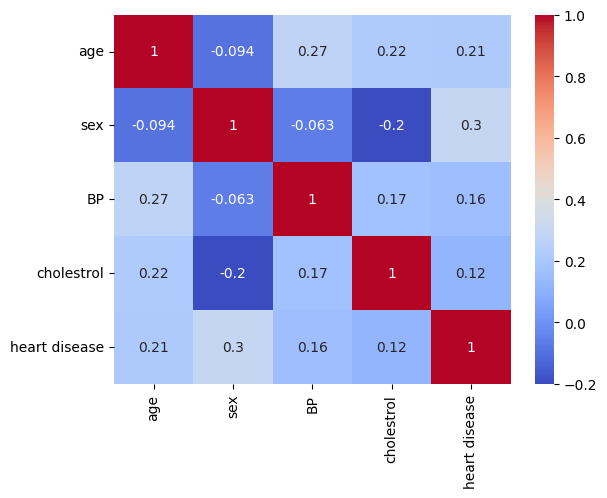

In [28]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [29]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

In [30]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [31]:

classifier_rf = RandomForestClassifier(random_state=100, n_jobs=-1, max_depth=5, n_estimators=100)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=100)

In [34]:
accuracy_score(y_test, classifier_rf.predict(x_test))

0.5925925925925926

In [35]:
params = {
    'max_depth': [2,5,10],
    'min_samples_leaf': [5,20,100],
    'min_samples_split':[5,50,100],
    'n_estimators': [10,50,100] #This variable was not present for decision tree
}

In [37]:
rf = RandomForestClassifier(random_state=100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [38]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_leaf': [5, 20, 100],
                         'min_samples_split': [5, 50, 100],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [39]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=50,
                       n_estimators=10, random_state=100)

In [48]:
rfclassifier = RandomForestClassifier(random_state=100,  max_depth=5, n_estimators=10,min_samples_leaf=5, min_samples_split=50,)

In [49]:
rfclassifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=50,
                       n_estimators=10, random_state=100)

In [50]:
y_pred_train = rfclassifier.predict(x_train)
y_pred_test = rfclassifier.predict(x_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7195767195767195
0.6049382716049383
